In [12]:
#산탄데르 고객만족도 예측

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("/content/train.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [14]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [15]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [16]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [18]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [20]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate = 0.05, random_state = 156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.803388	validation_1-auc:0.797852
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.812619	validation_1-auc:0.796774
[2]	validation_0-auc:0.811648	validation_1-auc:0.798697
[3]	validation_0-auc:0.812568	validation_1-auc:0.797626
[4]	validation_0-auc:0.814884	validation_1-auc:0.798837
[5]	validation_0-auc:0.814676	validation_1-auc:0.80085
[6]	validation_0-auc:0.814879	validation_1-auc:0.799201
[7]	validation_0-auc:0.815144	validation_1-auc:0.798952
[8]	validation_0-auc:0.81629	validation_1-auc:0.801921
[9]	validation_0-auc:0.816236	validation_1-auc:0.800339
[10]	validation_0-auc:0.815842	validation_1-auc:0.80191
[11]	validation_0-auc:0.816102	validation_1-auc:0.800052
[12]	validation_0-auc:0.818573	validation_1-auc:0.805199
[13]	validation_0-auc:0.816937	validation_1-auc:0.801944
[14]	validation_0-auc:0.816405	validation_1-auc:0.801992


In [22]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [24]:
from hyperopt import fmin, tpe, Trials
import random

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials)

print('best:', best)

Streaming output truncated to the last 5000 lines.

Stopping. Best iteration:
[26]	validation_0-auc:0.908972	validation_1-auc:0.832232


[0]	validation_0-auc:0.822654	validation_1-auc:0.806421

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.


Will train until validation_1-auc hasn't improved in 30 rounds.

[1]	validation_0-auc:0.834336	validation_1-auc:0.817872

[2]	validation_0-auc:0.842999	validation_1-auc:0.822532

[3]	validation_0-auc:0.850212	validation_1-auc:0.823688

[4]	validation_0-auc:0.852138	validation_1-auc:0.824149

[5]	validation_0-auc:0.859186	validation_1-auc:0.827664

[6]	validation_0-auc:0.863462	validation_1-auc:0.831131

[7]	validation_0-auc:0.866597	validation_1-auc:0.830712

[8]	validation_0-auc:0.873403	validation_1-auc:0.830441

[9]	validation_0-auc:0.877231	validation_1-auc:0.830676

[10]	validation_0-auc:0.879402	validation_1-auc:0.830689

[11]	validation_0-auc:0.882081	validation_1-auc:0.831012

[12]	validation_0-

In [40]:
#from xgboost import XGBClassifier
#from sklearn.metrics import roc_auc_score
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.725169	validation_1-auc:0.700004
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.812684	validation_1-auc:0.793859
[2]	validation_0-auc:0.809842	validation_1-auc:0.786723
[3]	validation_0-auc:0.817068	validation_1-auc:0.795687
[4]	validation_0-auc:0.825992	validation_1-auc:0.805727
[5]	validation_0-auc:0.82155	validation_1-auc:0.79821
[6]	validation_0-auc:0.820962	validation_1-auc:0.797879
[7]	validation_0-auc:0.8271	validation_1-auc:0.802887
[8]	validation_0-auc:0.83205	validation_1-auc:0.808762
[9]	validation_0-auc:0.829841	validation_1-auc:0.806881
[10]	validation_0-auc:0.834584	validation_1-auc:0.812104
[11]	validation_0-auc:0.836739	validation_1-auc:0.813287
[12]	validation_0-auc:0.838731	validation_1-auc:0.813964
[13]	validation_0-auc:0.838917	validation_1-auc:0.814228
[14]	validation_0-auc:0.836765	validation_1-auc:0.812141
[1

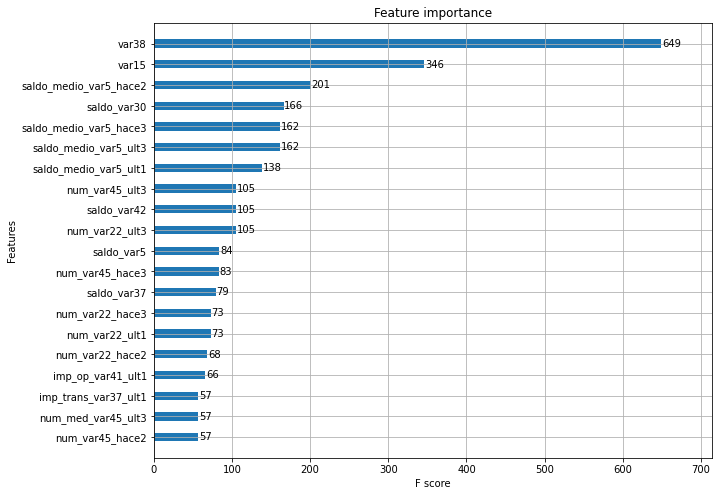

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [42]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's binary_logloss: 0.15523	training's auc: 0.82625	valid_1's binary_logloss: 0.15774	valid_1's auc: 0.809814
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.149605	training's auc: 0.833881	valid_1's binary_logloss: 0.153277	valid_1's auc: 0.81209
[3]	training's binary_logloss: 0.145485	training's auc: 0.839548	valid_1's binary_logloss: 0.150052	valid_1's auc: 0.814018
[4]	training's binary_logloss: 0.142197	training's auc: 0.845749	valid_1's binary_logloss: 0.147501	valid_1's auc: 0.819257
[5]	training's binary_logloss: 0.139595	training's auc: 0.848218	valid_1's binary_logloss: 0.145477	valid_1's auc: 0.821853
[6]	training's binary_logloss: 0.137401	training's auc: 0.853054	valid_1's binary_logloss: 0.144005	valid_1's auc: 0.822606
[7]	training's binary_logloss: 0.135455	training's auc: 0.854533	valid_1's binary_logloss: 0.14262	valid_1's auc: 0.823109
[8]	training's binary_logloss: 0.133684	training's auc: 0.858009	valid_1's

In [43]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [44]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [47]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials)

print('best:', best)

Streaming output truncated to the last 5000 lines.
[77]	training's binary_logloss: 0.116914	training's auc: 0.902049	valid_1's binary_logloss: 0.135824	valid_1's auc: 0.831115
[78]	training's binary_logloss: 0.116734	training's auc: 0.90283	valid_1's binary_logloss: 0.135839	valid_1's auc: 0.830942
[79]	training's binary_logloss: 0.116562	training's auc: 0.903251	valid_1's binary_logloss: 0.135839	valid_1's auc: 0.830958
[80]	training's binary_logloss: 0.116388	training's auc: 0.903684	valid_1's binary_logloss: 0.135864	valid_1's auc: 0.830791
[81]	training's binary_logloss: 0.116222	training's auc: 0.904087	valid_1's binary_logloss: 0.135862	valid_1's auc: 0.830825
[82]	training's binary_logloss: 0.116032	training's auc: 0.904618	valid_1's binary_logloss: 0.135862	valid_1's auc: 0.830801
[83]	training's binary_logloss: 0.115843	training's auc: 0.905198	valid_1's binary_logloss: 0.1358	valid_1's auc: 0.831204
[84]	training's binary_logloss: 0.115679	training's auc: 0.905611	valid_1's b

In [48]:
lgbm_clf = LGBMClassifier(n_estimators = 500, num_leaves = int(best['num_leaves']),
                          max_depth = int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample = round(best['subsample'],5),
                          learning_rate = round(best['learning_rate'],5))

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr, y_tr), 
                                                                                       (X_val, y_val)])
lgbm_roc_score = roc_auc_score(y_test, xgb_clf. predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's binary_logloss: 0.158583	training's auc: 0.829095	valid_1's binary_logloss: 0.160546	valid_1's auc: 0.804198
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.154168	training's auc: 0.836293	valid_1's binary_logloss: 0.156786	valid_1's auc: 0.81338
[3]	training's binary_logloss: 0.150707	training's auc: 0.838401	valid_1's binary_logloss: 0.153762	valid_1's auc: 0.815527
[4]	training's binary_logloss: 0.147867	training's auc: 0.842923	valid_1's binary_logloss: 0.151387	valid_1's auc: 0.815539
[5]	training's binary_logloss: 0.145538	training's auc: 0.846086	valid_1's binary_logloss: 0.149461	valid_1's auc: 0.816982
[6]	training's binary_logloss: 0.143454	training's auc: 0.849126	valid_1's binary_logloss: 0.147817	valid_1's auc: 0.819993
[7]	training's binary_logloss: 0.141641	training's auc: 0.851377	valid_1's binary_logloss: 0.146405	valid_1's auc: 0.821176
[8]	training's binary_logloss: 0.140065	training's auc: 0.85445	valid_